<a href="https://colab.research.google.com/github/RG2806/ai_spotle/blob/master/level3_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn import model_selection, preprocessing, metrics, svm, ensemble
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.model_selection import GridSearchCV
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd
import numpy as np

# text preprocessing
from nltk.tokenize import word_tokenize
import re

# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# preparing input to our model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# keras layers
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
pd.set_option('display.max_colwidth', -1)

In [ ]:
!git clone https://github.com/RG2806/ai_spotle.git

In [ ]:
!git clone https://github.com/lukasgarbas/nlp-text-emotion.git

In [ ]:
!pip3 install ktrain

In [ ]:
import pandas as pd
import numpy as np

import ktrain
from ktrain import text

In [ ]:
data_train = pd.read_csv('/content/nlp-text-emotion/data/data_train.csv', encoding='utf-8')
data_test = pd.read_csv('/content/nlp-text-emotion/data/data_test.csv', encoding='utf-8')

X_train = data_train.Text.tolist()
X_test = data_test.Text.tolist()

y_train = data_train.Emotion.tolist()
y_test = data_test.Emotion.tolist()

data = data_train.append(data_test, ignore_index=True)

class_names = ['joy', 'sadness', 'fear', 'anger', 'neutral']

print('size of training set: %s' % (len(data_train['Text'])))
print('size of validation set: %s' % (len(data_test['Text'])))
print(data.Emotion.value_counts())

data.head(10)

size of training set: 7934
size of validation set: 3393
joy        2326
sadness    2317
anger      2259
neutral    2254
fear       2171
Name: Emotion, dtype: int64


,Emotion,Text
0,neutral,There are tons of other paintings that I think are better .
1,sadness,"Yet the dog had grown old and less capable , and one day the gillie had come and explained with great sorrow that the dog had suffered a stroke , and must be put down ."
2,fear,When I get into the tube or the train without paying for the ticket.
3,fear,"This last may be a source of considerable disquiet and one might not at first see how such obviously ` immoral "" content could be defended as part of a system of morality ."
4,anger,"She disliked the intimacy he showed towards some of them , was resentful of the memories they shared of which she was not a part , and felt excluded ."
5,sadness,When my family heard that my Mother's cousin who lives in England wrote us to tell that he had cancer of the lymph glands.
6,joy,Finding out I am chosen to collect norms for Chinese aphasia (I will contribute to China's catching up with the West in neuropsychology).
7,anger,"A spokesperson said : ` Glen is furious that the new ` Anarchy "" promo features footage of Sid Vicious as well as himself ."
8,neutral,Yes .
9,sadness,"When I see people with burns I feel sad, actually I can not even express my feelings as I think that they must suffer a lot."


In [ ]:
encoding = {
    'joy': 0,
    'sadness': 1,
    'fear': 2,
    'anger': 3,
    'neutral': 4
}

# Integer values for each class
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

In [ ]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=350, 
                                                                       max_features=35000)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [ ]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 350
done.


In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=6)

In [ ]:

learner.fit_onecycle(2e-5, 3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
 146/1323 [==>...........................] - ETA: 24:07 - loss: 1.6434 - accuracy: 0.2580

In [ ]:

learner.validate(val_data=(x_test, y_test), class_names=class_names)

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

In [ ]:
import time 

message = 'I just broke up with my boyfriend'

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

In [ ]:
import time

message = 'delivery was hour late and my pizza was cold!'

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

Message: ['delivery was hour late and my pizza was cold!']
predicted: anger (0.12 seconds)


In [ ]:
import pandas as pd

import os
##combine all files in the lis
#df=pd.read_json("/content/ai_spotle/aithon2020_level_3/aithon_level_3_2020-09-22T05_11_55.txt")
df = pd.concat([pd.read_json("/content/ai_spotle/aithon2020_level_3/"+f) for c,f in enumerate(os.listdir("/content/ai_spotle/aithon2020_level_3/")) ])

In [ ]:
df.shape

(496448, 4)

In [ ]:
tok = WordPunctTokenizer()
lemma = WordNetLemmatizer()
# patterns to remove html tags numbers and special Characters
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
op = r'\bcovid\b\s+'
combined_pat = r'|'.join((pat1, pat2))
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
shortcuts = {'u': 'you', 'y': 'why', 'r': 'are', 'doin': 'doing', 'hw': 'how', 'k': 'okay', 'm': 'am', 'b4': 'before',
            'idc': "i do not care", 'ty': 'thankyou', 'wlcm': 'welcome', 'bc': 'because', '<3': 'love', 'xoxo': 'love',
            'ttyl': 'talk to you later', 'gr8': 'great', 'bday': 'birthday', 'awsm': 'awesome', 'gud': 'good', 'h8': 'hate',
            'lv': 'love', 'dm': 'direct message', 'rt': 'retweet', 'wtf': 'hate', 'idgaf': 'hate',
             'irl': 'in real life', 'yolo': 'you only live once'}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')
shortcuts_pattern = re.compile(r'\b(' + '|'.join(shortcuts.keys()) + r')\b')
def clean_text(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)#for removing patterns like #,@ and punctuation
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    shortcuts_handled = shortcuts_pattern.sub(lambda x: shortcuts[x.group()],neg_handled)
    letters_only = re.sub("[^a-zA-Z]", " ", shortcuts_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    lemmated_words = [lemma.lemmatize(word) for word in words]
    return (" ".join( lemmated_words)).strip()

In [ ]:
df=df[df['location'].apply(lambda x: x.lower().find("india")>-1)]
df['cleaned_tweets'] = df['text'].apply(lambda x: clean_text(x))

In [ ]:
df.shape

(496448, 5)

In [ ]:
df.head()

,text,location,date,time,cleaned_tweets
0,"#CoronaVirusUpdates LIVE | Recoveries exceed new cases for 4 days, says @MoHFW_INDIA ; All Covid-19 beds at GMCH, Ponda hospital full: Goa minister \n\nTrack latest #coronaviruspandemic news here: \nhttps://t.co/3NiXJqEMQR",IN,Sep 22,11:30:00,coronavirusupdates live recovery exceed new case for day say all covid bed at gmch ponda hospital full goa minister track latest coronaviruspandemic news here
1,@plenkless @talkRADIO @JuliaHB1 You really think @CMO_England and @uksciencechief have more of an idea ? They still say 92% of the population are susceptible to Covid 19 despite evidence on TCells and cross immunity with other Corona viruses. They appear to have learned nothing!,India,Sep 22,11:29:59,you really think and have more of an idea they still say of the population are susceptible to covid despite evidence on tcells and cross immunity with other corona virus they appear to have learned nothing
2,"@MsRain62 @kseniaqt @RunningDeep67 @JamesTodaroMD Flu or the avg corona /rhino has a repro rate of 2 or less, covid 19 has a repro rate of 4+ . Masks and social distancing lower that number below 1. Get over it",Woking Surrey England,Sep 22,11:29:50,flu or the avg corona rhino ha repro rate of or le covid ha repro rate of mask and social distancing lower that number below get over it
3,Corona Schism: UK Scientists Split Over How Government Should Deal With Surge in COVID-19 Cases - https://t.co/x1LJX1uyYS @libertyIAB @oohincensed @NeuroNerd78 @Reptoid_Hunter @Sukyspook @StarSparkle_UK @crazyjane125 @5Agenda21 @HHMU_Banksia https://t.co/y6VHdlJ514,somewhere on a big blue ball,Sep 22,11:29:00,corona schism uk scientist split over how government should deal with surge in covid case
4,UPDATE: Corona schism: UK scientists split over how government should deal with surge in COVID-19 cases\n\n#SputnikUpdates https://t.co/3y1uJTXU9w,Nemesis Nibiru 🙏🐈✨,Sep 22,11:28:10,update corona schism uk scientist split over how government should deal with surge in covid case sputnikupdates


In [ ]:
df['analysis'] = df['cleaned_tweets'].apply(lambda x : predictor.predict(x))

In [ ]:
df.shape

In [ ]:
df.to_csv('filterd_complete_cnn.csv',index=False)

In [26]:
df.head()

,text,location,date,time,cleaned_tweets,analysis
5,Corona knows.....\n\n10pm curfew for pubs.\n\n*New Official Government slogan*\n\nChat Shit And You Catch It 🍺😷\n\n#CoronavirusBriefing #covidbriefing \n#Lockdown2 #Covid_19,"Chennai, India",Sep 22,17:29:04,corona know pm curfew for pub new official government slogan chat shit and you catch it coronavirusbriefing covidbriefing lockdown covid,fear
8,@PeteThamel Are they retesting these kids? Tests are wrong 90% of the time. The contact tracing better be 15 minutes next to a person w corona in doors or else it’s a scam https://t.co/KpJObBqi4Y,India,Sep 22,17:25:46,are they retesting these kid test are wrong of the time the contact tracing better be minute next to person corona in door or else it scam,fear
13,@BrennaSpencer Oliver Janich Vs TJump | Are the Numbers Exaggerated?\nhttps://t.co/648wp9TZ8d\n#Corona #Covid_19 #COVID19,"New Delhi, India",Sep 22,17:20:11,oliver janich v tjump are the number exaggerated covid covid,fear
15,One of my friends in Pakistan found out he had corona when he couldn’t taste or smell his americano. He calls it the Covid Coffee Test.,India,Sep 22,17:19:26,one of my friend in pakistan found out he had corona when he couldn taste or smell his americano he call it the covid coffee test,fear
19,"@BBCNews when reporting statistics on Corona virus daily , please compare the UK figures with Sweden’s figures as both countries are dealing with Covid totally different. you compare the UK with Spain/ France but their approach is the same as ours","Bhubaneshwar, India",Sep 22,17:16:24,when reporting statistic on corona virus daily please compare the uk figure with sweden figure a both country are dealing with covid totally different you compare the uk with spain france but their approach is the same a ours,fear


In [ ]:
class_names = ['joy', 'fear', 'anger', 'sadness', 'neutral']
df[df.analysis=='anger'].head(10)

,text,location,date,time,cleaned_tweets,analysis
1,@plenkless @talkRADIO @JuliaHB1 You really think @CMO_England and @uksciencechief have more of an idea ? They still say 92% of the population are susceptible to Covid 19 despite evidence on TCells and cross immunity with other Corona viruses. They appear to have learned nothing!,India,Sep 22,11:29:59,you really think and have more of an idea they still say of the population are susceptible to covid despite evidence on tcells and cross immunity with other corona virus they appear to have learned nothing,anger
211,"cw // covid , food\n\nhey besties i did the corona test and now imnat my uncles restaurant 👍🏻👍🏻","Balotra, India",Sep 22,08:45:45,cw covid food hey besties did the corona test and now imnat my uncle restaurant,anger
295,"corona vaccination: 4 out of 10 French citizens would refuse vaccine- Ipsos - A new Ipsos poll has found that 4 out 10 French citizens would refuse a COVID-19 vaccination if it were available. According to the survey,… Read... https://t.co/Mah0ATePll https://t.co/ywvw8YnyNa","jhansi Uttar Pradesh, India",Sep 22,07:28:43,corona vaccination out of french citizen would refuse vaccine ipsos new ipsos poll ha found that out french citizen would refuse covid vaccination if it were available according to the survey read,anger
302,Due to COVID we don’t have cones; but we can still have ice cream. 😋🍦 #NationalIceCreamConeDay #CardinaleWayMazdaCorona\n\nWhat is your favorite kind of cone? COMMENT BELOW ⬇️ https://t.co/eb4atfg9qu,"Punjab, India",Sep 22,07:27:03,due to covid we don have cone but we can still have ice cream nationalicecreamconeday cardinalewaymazdacorona what is your favorite kind of cone comment below,anger
362,"@jsolomonReports @TrueNPatriot -\n\nFor anyone who does not know why the Corona Virus was \n\nrenamed to Covid 19, you can just thank the White Hats.\n\nhttps://t.co/Q79ahwTucA…\n\n-",India,Sep 22,06:36:58,for anyone who doe not know why the corona virus wa renamed to covid you can just thank the white hat,anger
369,The purpose of a Green Democratic Transformation is the protection of society and its material conditions of existence in a way that empowers people\n\nChantal Mouffe @ChantalMouffe\n\nA Left populist Strategy for Post-COVID-19\n\nhttps://t.co/zHSRp61R78\n\n#GreenNewDeal #COVID19 #Corona https://t.co/MlFxuQhMnE,"Ahmadabad City, India",Sep 22,06:32:37,the purpose of green democratic transformation is the protection of society and it material condition of existence in way that empowers people chantal mouffe left populist strategy for post covid covid corona,anger
432,@Suriya_offl @krishoffl @SonyMusicSouth @kavingarmadhan @thisispriyamali @sirajkhan_skp @barani_offl @balaji_indian Please look into the issue.\n\nShe was found Corona positive after giving neet and she is no longer with us.\n\nStudents having low immunity were forced to give exams. \n\nParliament was shortened due to COVID.\n\nBut no one cares for students and parents. https://t.co/ZlWjHqCnV8,India,Sep 22,05:37:55,please look into the issue she wa found corona positive after giving neet and she is no longer with u student having low immunity were forced to give exam parliament wa shortened due to covid but no one care for student and parent,anger
443,I'm just no getting this Corona/Covid virus thing. I see the majority of people abide by the rules in every capacity yet this thing is apparently getting worse. If so it has to be airborne in the atmosphere. Nothing to do with 2m distance or whatever. It's just no adding up🤔👎,India,Sep 22,05:30:06,am just no getting this corona covid virus thing see the majority of people abide by the rule in every capacity yet this thing is apparently getting worse if so it ha to be airborne in the atmosphere nothing to do with distance or whatever it just no adding up,anger
521,"today's India #corona cases are 55 lakhs , \nkishan reddy things 54.98 lakh Indians went &amp; hugged and kissed tablighis to infect themselves of #covid !!!

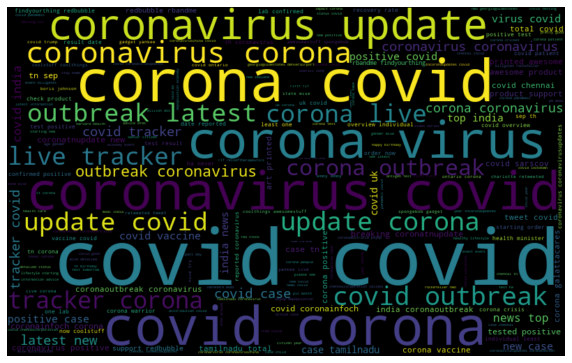

In [ ]:
normal_words =' '.join([text for text in df['cleaned_tweets'][df['analysis'] == 'joy']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [27]:
df.groupby('analysis').count()

,text,location,date,time,cleaned_tweets
analysis,,,,,
anger,881,881,881,881,881
fear,81452,81452,81452,81452,81452
joy,946,946,946,946,946
neutral,518,518,518,518,518
sadness,449,449,449,449,449
